In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [273]:

# Real time price data at frequency of 5 mins across 3 zones 
# Frequency converted to every 10mins to match sunshine data
pricedata = pd.read_csv('Data/caiso_lmp_rt_5min_zones_2023Q1.csv', skiprows=3)
pricedata.rename(columns={'Local Timestamp Pacific Time (Interval Beginning)':'begin_time'}, inplace=True)
pricedata['begin_time'] = pd.to_datetime(pricedata['begin_time'])
pricedata = pricedata[pricedata['begin_time'].apply(lambda x: x.minute % 10 == 0)]

# Electricity generation data by source type at frequency of 5 mins
# Frequency converted to every 10mins to match sunshine data
gendata = pd.read_csv('Data/caiso_gen_all_5min_2023Q1.csv', skiprows=3)
gendata.rename(columns={'Local Timestamp Pacific Time (Interval Beginning)':'begin_time'}, inplace=True)
gendata['begin_time'] = pd.to_datetime(gendata['begin_time'])
gendata = gendata[gendata['begin_time'].apply(lambda x: x.minute % 10 == 0)]
gendata['solar_scaled'] = gendata.apply(lambda x: x['Solar Generation (MW)']/20 , axis=1)

# Solar footprints file in data folder gives areas of solar farms, Riverside county seems to have two large solar farms so selected that for sunshine data

riverside_sunshine_data = pd.read_csv('Data/890384_33.98_-117.37_2023.csv', skiprows=2)
riverside_sunshine_data['begin_time'] = riverside_sunshine_data.apply(lambda x: datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']), int(x['Hour']), int(x['Minute']),0) , axis=1)


In [274]:
def filter_times(df, time1, time2):
    return df.apply(lambda x: (time1 <= x['begin_time']) and (x['begin_time'] <= time2) , axis=1)

In [275]:
# DHI, DNI and GHI are different kinds of radiation
riverside_sunshine_data[['begin_time', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

,begin_time,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2023-01-01 00:00:00,0,0,0
1,2023-01-01 00:10:00,0,0,0
2,2023-01-01 00:20:00,0,0,0
3,2023-01-01 00:30:00,0,0,0
4,2023-01-01 00:40:00,0,0,0
...,...,...,...,...
52555,2023-12-31 23:10:00,0,0,0
52556,2023-12-31 23:20:00,0,0,0
52557,2023-12-31 23:30:00,0,0,0
52558,2023-12-31 23:40:00,0,0,0


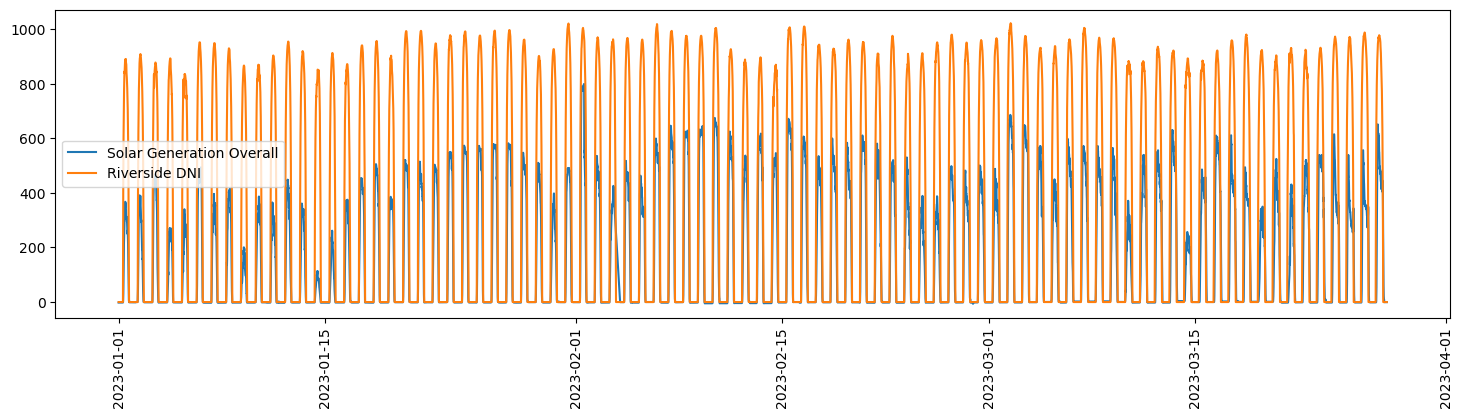

In [276]:
time1 = datetime.datetime(2023, 1, 1, 0, 0, 0)
time2 = datetime.datetime(2023, 3, 28, 0, 0, 0)

plt.figure(figsize=(18, 4))
plt.plot(gendata[filter_times(gendata, time1, time2)]['begin_time'], gendata[filter_times(gendata, time1, time2)]['solar_scaled'], label='Solar Generation Overall')
#plt.plot(pricedata[filter_times(pricedata, time1, time2)]['begin_time'], pricedata[filter_times(pricedata, time1, time2)]['NP-15 LMP'])
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky DHI'], label='Riverside DHI')
plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky DNI'], label='Riverside DNI')
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky GHI'], label='Riverside GHI')
plt.xticks(rotation=90)
plt.legend()
plt.show()